In [1]:
import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from keras.utils import to_categorical

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Layer

In [41]:
# Charger les données
train_images = np.load("train_images.npy")
train_labels = np.load("train_labels.npy")
test_images = np.load("test_images.npy")
test_labels = np.load("test_labels.npy")

ValueError: cannot reshape array of size 2359264 into shape (60000,28,28,1)

In [ ]:
# Visualisation des shapes
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


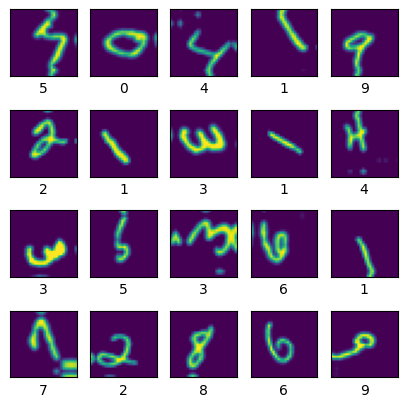

In [ ]:
# Affichage des 20 première images
plt.figure(figsize=[5,5])
for i in range (20):    # for first 20 images
  plt.subplot(4, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i])

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Prétraitement des données
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# Normalisation de test_images seulement car train_images deja fait
test_images = test_images/255
shape_train = train_images.shape

In [ ]:
# Reshape des données pour utilisé Convolution
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [ ]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
# shuffle the data
ns =  train_images.shape[0] #number of examples
np.random.seed()
shuffle_index = np.random.permutation(ns)
train_images, train_labels = train_images[shuffle_index,:], train_labels[shuffle_index,]
#

In [3]:
# Création du Model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 703,978 (2.69 MB)

 Trainable params: 703,594 (2.68 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Entrainement du model
history = model.fit(train_images, train_labels, batch_size=600, epochs=10, validation_data=(test_images, test_labels))
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.3975 - loss: 1.9220 - val_accuracy: 0.1135 - val_loss: 7.8168
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7748 - loss: 0.7214 - val_accuracy: 0.1135 - val_loss: 10.9105
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8578 - loss: 0.4585 - val_accuracy: 0.1135 - val_loss: 9.8262
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8957 - loss: 0.3430 - val_accuracy: 0.1319 - val_loss: 8.6843
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9163 - loss: 0.2760 - val_accuracy: 0.3111 - val_loss: 6.7639
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9305 - loss: 0.2301 - val_accuracy: 0.4809 - val_loss: 2.1537
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9365 - loss: 0.2054 - val_accuracy: 0.8828 - val_loss: 0.3692
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9437 - loss: 0.1798 - val_ac

NameError: name 'scores' is not defined

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


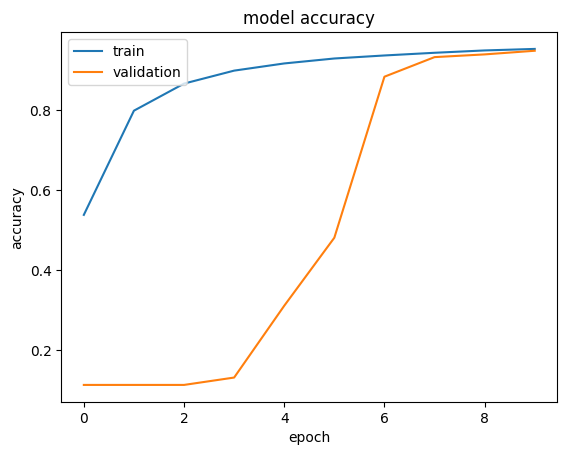

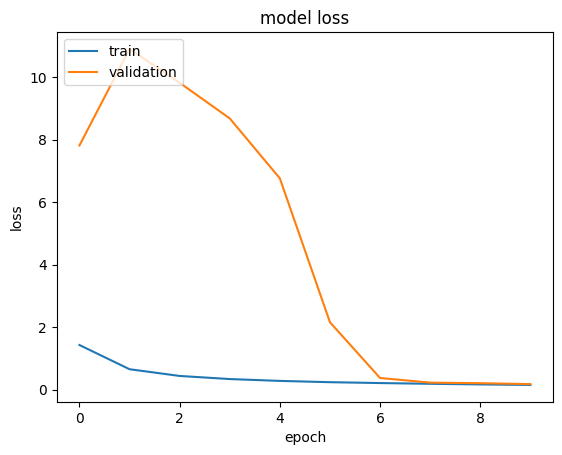

In [ ]:
# plot the history
#
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(train_images)
print(prediction)
pred_uni = np.argmax(prediction, axis=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
[[4.6585437e-06 7.7015844e-05 8.0012967e-04 ... 4.6952311e-03
  6.9641552e-05 8.7447421e-05]
 [9.9825066e-01 2.4999463e-06 3.1121325e-04 ... 2.4508799e-06
  2.4076751e-05 6.6009539e-05]
 [4.4949632e-04 3.9862384e-04 1.2098573e-02 ... 1.5906467e-03
  3.9126116e-04 4.7340710e-02]
 ...
 [5.7186385e-09 9.7557518e-09 5.8990472e-11 ... 3.2471092e-09
  5.7914140e-09 2.0144586e-08]
 [2.1656593e-03 4.0291674e-03 8.6030964e-04 ... 5.6732015e-06
  4.5016492e-03 1.5706897e-06]
 [3.7896819e-02 1.6400615e-04 2.3869354e-01 ... 1.0557205e-02
  5.9784186e-01 8.5604906e-02]]


[Text(0.5, 80.7222222222222, 'reel'), Text(95.72222222222221, 0.5, 'predit')]

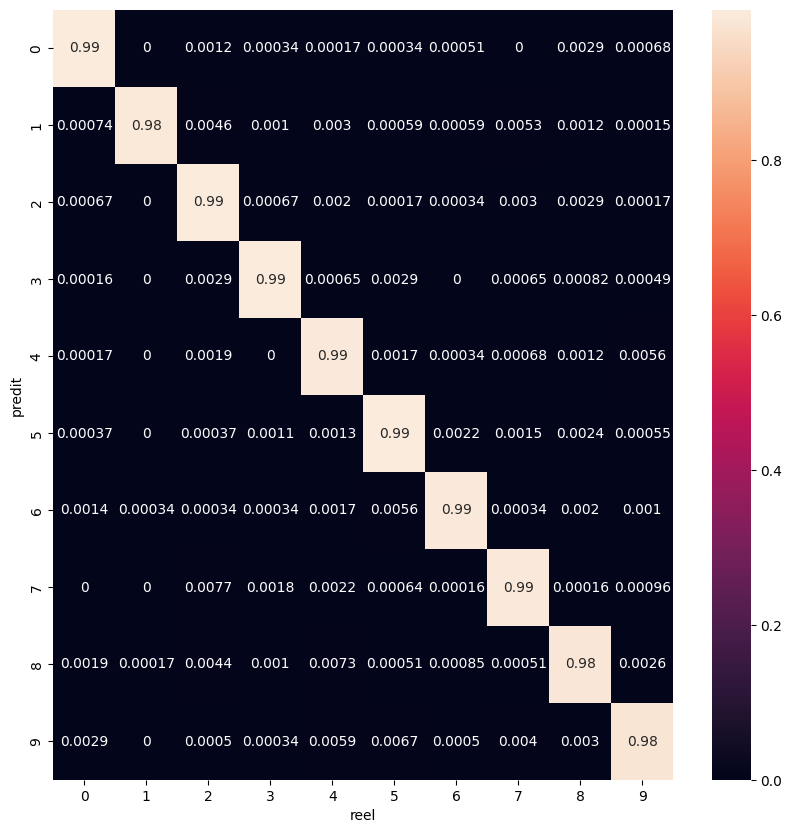

In [ ]:
# Matrice de confussion
train_labels = np.argmax(train_labels, axis=1)
plt.figure(figsize=(10, 10))
ax = sns.heatmap(confusion_matrix(train_labels, pred_uni, normalize="true"), annot=True)
ax.set(xlabel="reel", ylabel="predit")

In [ ]:
scores = model.evaluate(test_images, test_labels)